### This is a tutorial for unsharp masking.

In [1]:
#The first step would be to install kornia, OpenCV, numpy, PyTorch if you have not already
#pip install kornia
#pip install opencv-python
#pip install numpy
#for PyTorch you can visit https://pytorch.org/ to select the appropriate version

In [2]:
import kornia
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
!wget https://github.com/kornia/data/raw/main/simba.png

--2021-05-17 11:28:21--  https://github.com/kornia/data/raw/main/simba.png
Resolving github.com (github.com)... 64:ff9b::dea:d226, 13.234.210.38
Connecting to github.com (github.com)|64:ff9b::dea:d226|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kornia/data/main/simba.png [following]
--2021-05-17 11:28:23--  https://raw.githubusercontent.com/kornia/data/main/simba.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 64:ff9b::b9c7:6e85, 64:ff9b::b9c7:6f85, 64:ff9b::b9c7:6c85, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|64:ff9b::b9c7:6e85|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104892 (102K) [image/png]
Saving to: 'simba.png'

     0K .......... .......... .......... .......... .......... 48%  258K 0s
    50K .......... .......... .......... .......... .......... 97%  399K 0s
   100K ..                                                    100% 

In [4]:
#Read the image with OpenCV
img: np.ndarray = cv2.imread('simba.png')
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#we get the height and width of the image
height = img.shape[0]
width = img.shape[1]

In [5]:
#convert image to tensor
data: torch.tensor = kornia.image_to_tensor(img, keepdim=False)
data=data.float() / 255

In [6]:
#Next step would be to sharpen the tensor
#You can set the kernel size and sigma size 
#sharpened_tensor=kornia.filters.unsharp_mask(data, kernel_size, sigma)
#Note: The kernel_size parametre should be of type Tuple[int, int] and the sigma parametre should be of type Tuple[float, float]
sharpened_tensor=kornia.filters.unsharp_mask(data, (7,7), (1.5,1.5))

In [7]:
#Converting the sharpened tensor to image
sharpened_image=kornia.tensor_to_image(sharpened_tensor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


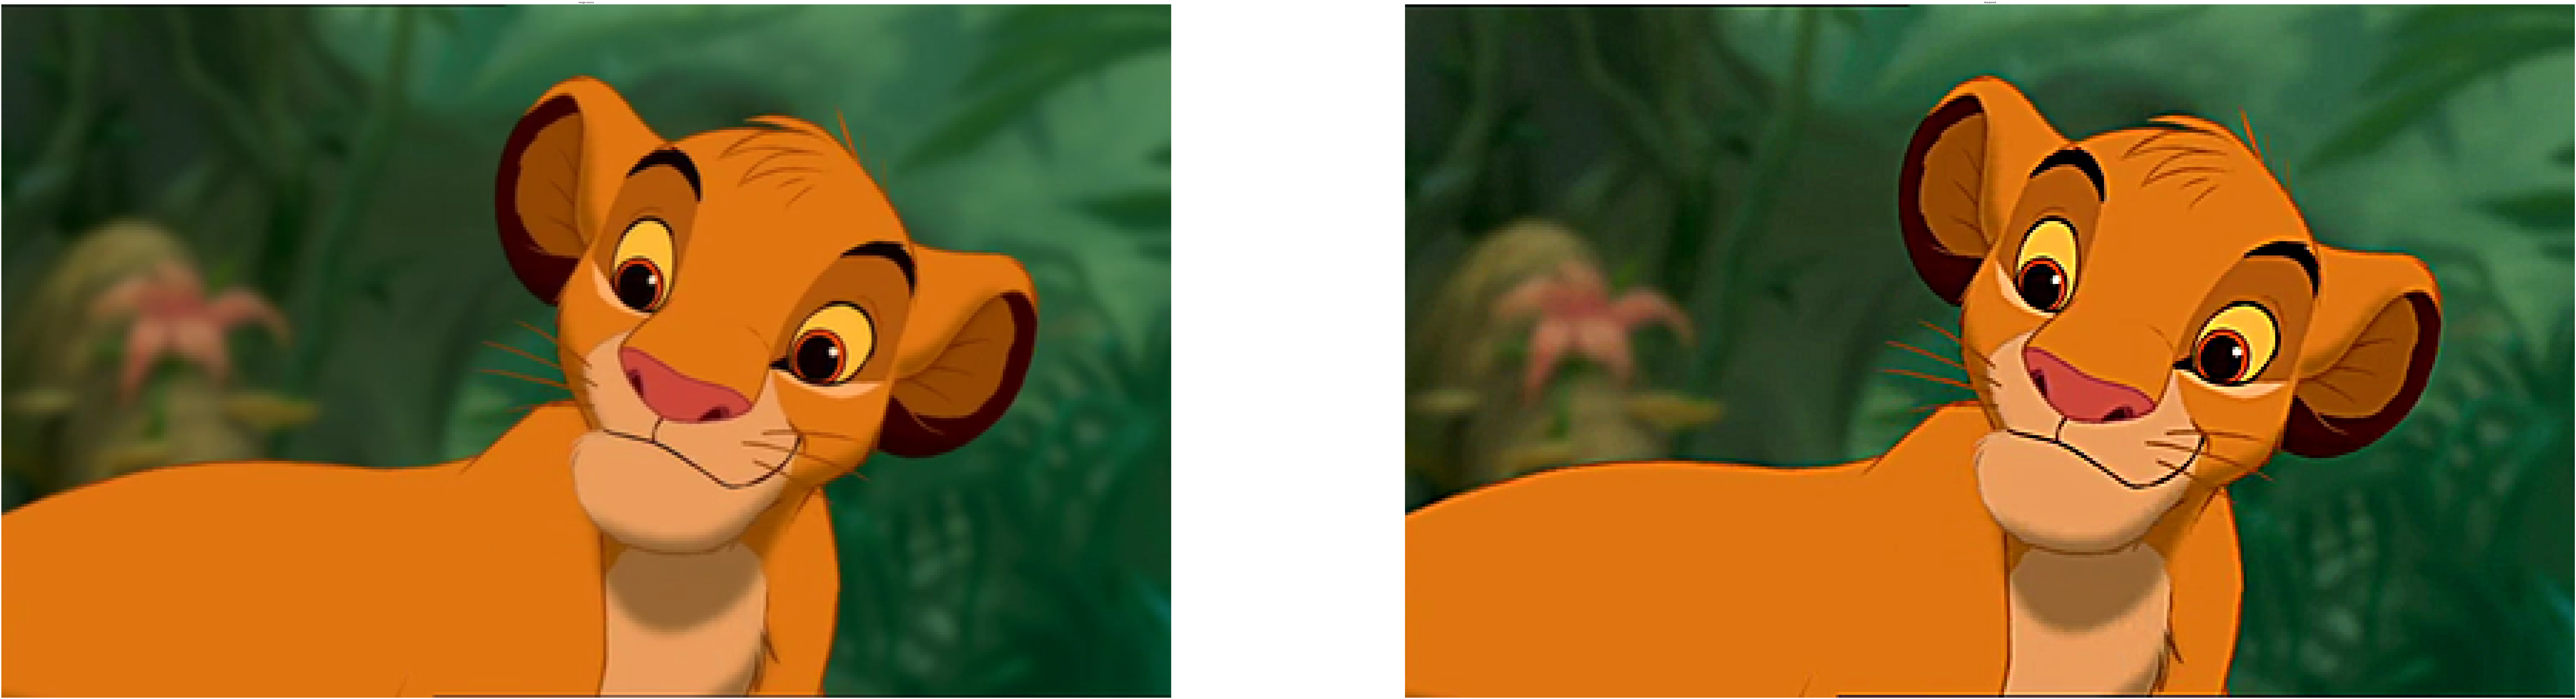

In [8]:
#To display the input image and sharpened image 
fig, axs = plt.subplots(1, 2, figsize=(height, width))
axs = axs.ravel()

axs[0].axis('off')
axs[0].set_title('image source')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('sharpened')
axs[1].imshow(sharpened_image)